In [1]:
import pandas as pd

In [3]:
data=pd.read_csv('train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Sex']= encoder.fit_transform(data['Sex'])
data['Ticket']= encoder.fit_transform(data['Ticket'])
data['Cabin']= encoder.fit_transform(data['Cabin'])
data['Embarked']= encoder.fit_transform(data['Embarked'])

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,147,2


In [16]:
data=data.drop(columns='Name',axis=1)

KeyError: "['Name'] not found in axis"

In [ ]:
data.info()

In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [17]:
data=data.drop(columns=['Cabin'],axis=1)

In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [21]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [22]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,2
1,2,1,1,0,38.0,1,0,596,71.2833,0
2,3,1,3,0,26.0,0,0,669,7.9250,2
3,4,1,1,0,35.0,1,0,49,53.1000,2
4,5,0,3,1,35.0,0,0,472,8.0500,2


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

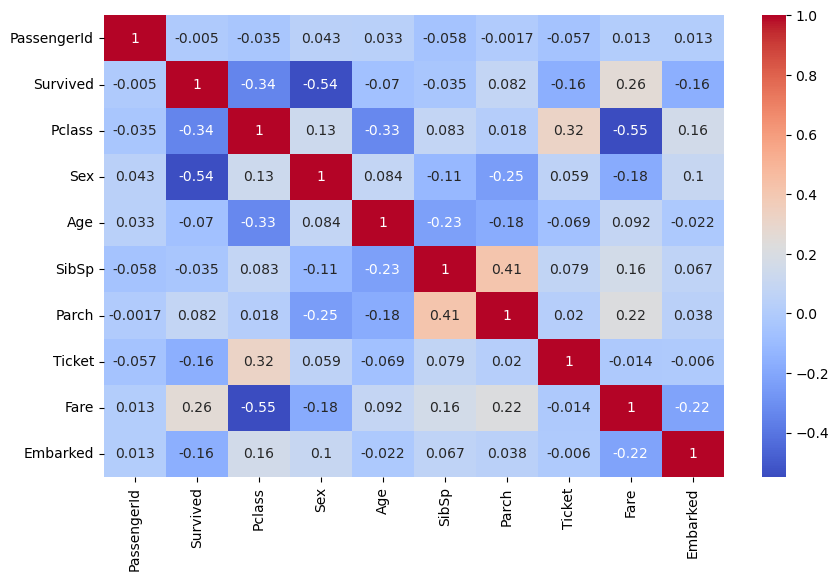

In [39]:
plt.figure(figsize=(10,6))
corr=data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [41]:
X=data.drop(columns=['Survived','PassengerId','Embarked', 'SibSp','Parch'], axis=1)
Y=data['Survived']

In [42]:
X.head()

,Pclass,Sex,Age,Ticket,Fare
0,3,1,22.0,523,7.2500
1,1,0,38.0,596,71.2833
2,3,0,26.0,669,7.9250
3,1,0,35.0,49,53.1000
4,3,1,35.0,472,8.0500


In [43]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,stratify=Y,test_size=0.2,random_state=42)

In [45]:
X_train.shape

(712, 5)

In [46]:
X_test.shape

(179, 5)

In [67]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,Y_train)

LogisticRegression()

In [68]:
model1.score(X_test,Y_test)

0.7932960893854749

In [69]:
model1.score(X_train,Y_train)

0.7949438202247191

In [70]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train_bal,Y_train_bal=smote.fit_resample(X_train,Y_train)

In [71]:
model=LogisticRegression()
model.fit(X_train_bal,Y_train_bal)

LogisticRegression()

In [73]:
model.score(X_train_bal,Y_train_bal)

0.8200455580865603

In [74]:
model.score(X_test,Y_test)

0.7932960893854749

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
param_grid = [
    # L1 regularization → only liblinear
    {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1'],
        'solver': ['liblinear'],
        'max_iter': [1000],
        'class_weight': [None, 'balanced']
    },
    # L2 regularization → lbfgs or liblinear
    {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [1000],
        'class_weight': [None, 'balanced']
    }
]


In [93]:
search=RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10 ,cv=5, random_state=42)
search.fit(X_train_bal, Y_train_bal)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions=[{'C': [0.01, 0.1, 1, 10],
                                         'class_weight': [None, 'balanced'],
                                         'max_iter': [1000], 'penalty': ['l1'],
                                         'solver': ['liblinear']},
                                        {'C': [0.01, 0.1, 1, 10],
                                         'class_weight': [None, 'balanced'],
                                         'max_iter': [1000], 'penalty': ['l2'],
                                         'solver': ['lbfgs', 'liblinear']}],
                   random_state=42)

In [98]:
best_model=search.best_estimator_

In [99]:
best_model.score(X_train_bal, Y_train_bal)

0.8200455580865603

In [100]:
best_model.score(X_test,Y_test)

0.7932960893854749

In [101]:
from sklearn.svm import SVC

In [106]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train_bal)

In [152]:
model2=SVC(kernel='linear' ,C=0.0001, probability=True)

In [153]:
model2.fit(X_train_scaled, Y_train_bal)

SVC(C=0.0001, kernel='linear', probability=True)

In [154]:
model2.score(X_train_scaled, Y_train_bal)

0.6605922551252847

In [155]:
model2.score(X_test,Y_test)

E:\anaconda installations\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.6536312849162011

In [156]:
X_train_scaled.dtype

dtype('float64')

In [112]:
Y_train_bal.dtype

dtype('int64')

In [113]:
type(Y_train_bal)

pandas.core.series.Series

In [114]:
type(X_train_scaled)

numpy.ndarray

In [115]:
type(X_test)

pandas.core.frame.DataFrame

In [161]:
from sklearn.ensemble import VotingClassifier
ensemble_model= VotingClassifier(
    estimators=[
        ('lr', model),
        ('svr',model2)
    ],
voting='soft'
)
ensemble_model.fit(X_train_scaled, Y_train_bal)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svr',
                              SVC(C=0.0001, kernel='linear',
                                  probability=True))],
                 voting='soft')

In [162]:
ensemble_model.score(X_train_scaled, Y_train_bal)

0.8177676537585421

In [163]:
ensemble_model.score(X_test, Y_test)

E:\anaconda installations\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
E:\anaconda installations\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.6145251396648045

//given worse result after ensembe  because second model already have low accuracy and with soft voting, weak model outvotes the strong model.